In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
train = pd.read_csv("airbnb_train.csv")  # adapte le chemin si besoin

# --- 1. Aperçu de la structure ---
print("🗂️ Structure du dataset :")
print(train.info())


🗂️ Structure du dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22234 entries, 0 to 22233
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      22234 non-null  int64  
 1   log_price               22234 non-null  float64
 2   property_type           22234 non-null  object 
 3   room_type               22234 non-null  object 
 4   amenities               22234 non-null  object 
 5   accommodates            22234 non-null  int64  
 6   bathrooms               22183 non-null  float64
 7   bed_type                22234 non-null  object 
 8   cancellation_policy     22234 non-null  object 
 9   cleaning_fee            22234 non-null  bool   
 10  city                    22234 non-null  object 
 11  description             22234 non-null  object 
 12  first_review            17509 non-null  object 
 13  host_has_profile_pic    22178 non-null  object 
 14  host_identit

In [13]:
# --- 2. Statistiques descriptives ---
print("\n📊 Statistiques descriptives :")
print(train.describe(include='all'))


📊 Statistiques descriptives :
                  id     log_price property_type        room_type amenities  \
count   2.223400e+04  22234.000000         22234            22234     22234   
unique           NaN           NaN            31                3     21160   
top              NaN           NaN     Apartment  Entire home/apt        {}   
freq             NaN           NaN         14635            12348       161   
mean    1.122269e+07      4.783481           NaN              NaN       NaN   
std     6.080480e+06      0.718758           NaN              NaN       NaN   
min     3.362000e+03      2.302585           NaN              NaN       NaN   
25%     6.202924e+06      4.317488           NaN              NaN       NaN   
50%     1.217425e+07      4.700480           NaN              NaN       NaN   
75%     1.639502e+07      5.220356           NaN              NaN       NaN   
max     2.120450e+07      7.600402           NaN              NaN       NaN   

        accommodates

In [14]:
# --- 3. Valeurs manquantes ---
print("\n🔎 Valeurs manquantes :")
missing_values = train.isnull().sum().sort_values(ascending=False)
missing = missing_values[missing_values > 0]
print(missing)



🔎 Valeurs manquantes :
host_response_rate        5475
review_scores_rating      4978
first_review              4725
last_review               4716
neighbourhood             2086
zipcode                    303
host_identity_verified      56
host_since                  56
host_has_profile_pic        56
bathrooms                   51
beds                        35
bedrooms                    26
dtype: int64


C:\Users\thek7\AppData\Local\Temp\ipykernel_12432\1398965321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.values, y=missing.index, palette="viridis")


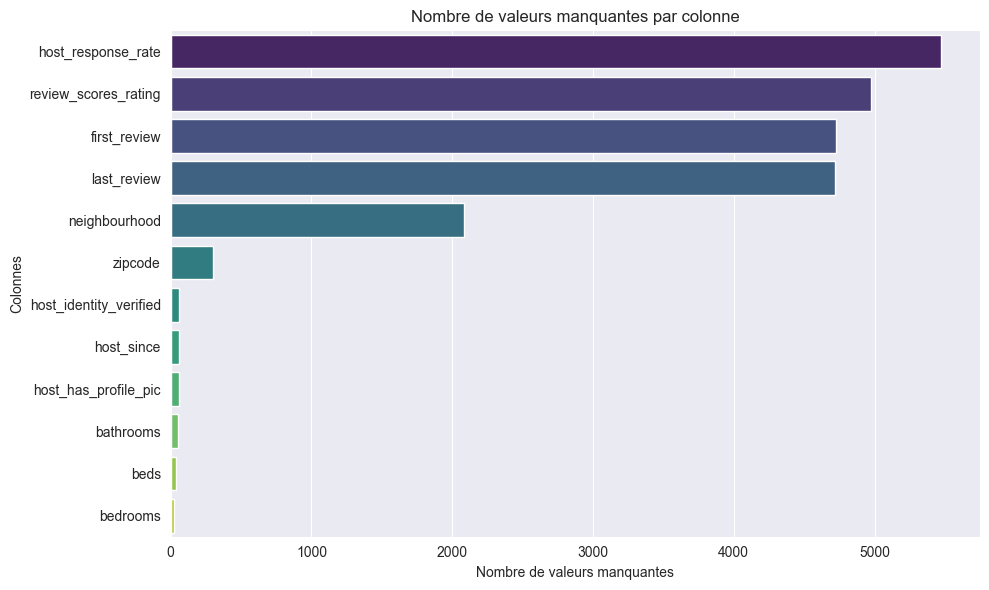

In [15]:
# 🔍 Affichage graphique des valeurs manquantes
if not missing.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing.values, y=missing.index, palette="viridis")
    plt.title("Nombre de valeurs manquantes par colonne")
    plt.xlabel("Nombre de valeurs manquantes")
    plt.ylabel("Colonnes")
    plt.tight_layout()
    plt.show()
else:
    print("✅ Aucune valeur manquante")

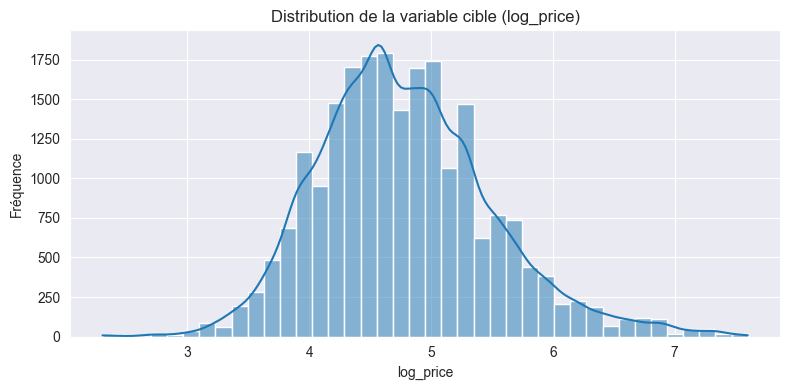

In [16]:
# --- 4. Distribution de log_price ---
plt.figure(figsize=(8, 4))
sns.histplot(train['log_price'], bins=40, kde=True)
plt.title("Distribution de la variable cible (log_price)")
plt.xlabel("log_price")
plt.ylabel("Fréquence")
plt.grid(True)
plt.tight_layout()
plt.show()

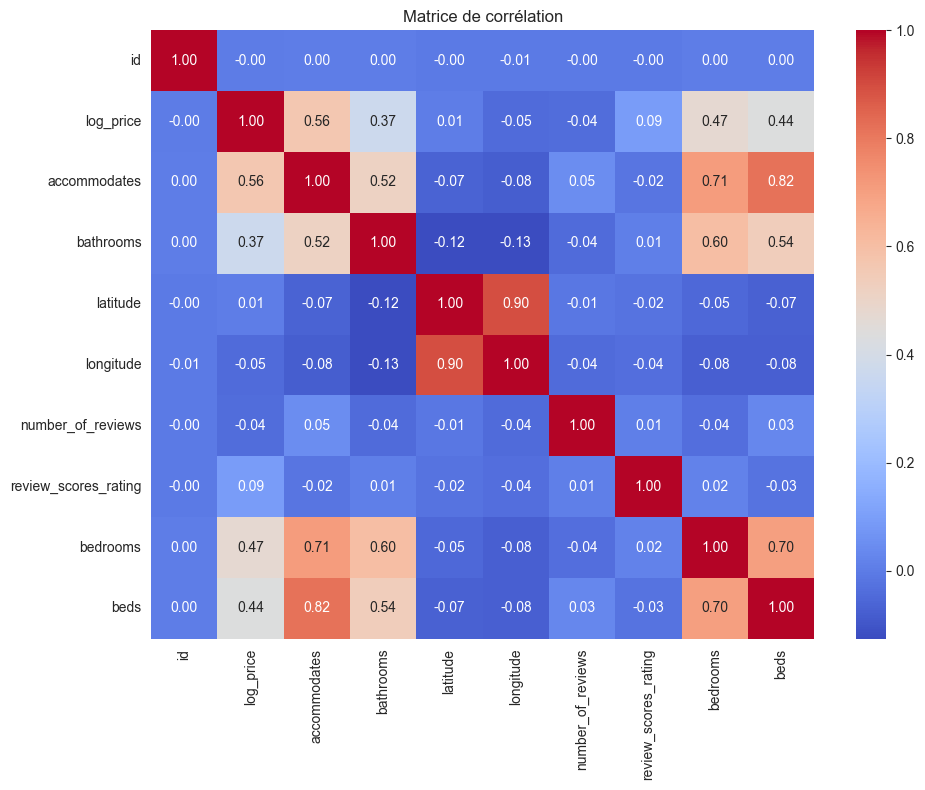

In [17]:
#Corrélation entre les variables numériques ---
plt.figure(figsize=(10, 8))
num_cols = train.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = train[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

In [19]:
# --- Supprimer description, name si pas utilisées plus tard ---
train = train.drop(columns=['description', 'name'], errors='ignore')

# --- Nettoyage zipcode ---
train['zipcode_clean'] = train['zipcode'].astype(str).str.extract(r'(\d{5})')
train['zipcode_clean'] = pd.to_numeric(train['zipcode_clean'], errors='coerce')

# --- Nettoyage de amenities : compter le nombre d’équipements ---
train['amenities_count'] = train['amenities'].astype(str).apply(lambda x: len(x.strip('{}').split(',')))


In [20]:


%pip install numpy

import numpy as np
import datetime
from datetime import datetime

# Charger le jeu de test (adapte le chemin si besoin)
test = pd.read_csv("airbnb_test.csv")

# --- 🔁 Copie de sécurité ---
train_encoded = train.copy()
test_encoded = test.copy()

# --- 1. Remplissage des valeurs manquantes numériques (par médiane) ---
num_cols = ['bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews']
for col in num_cols:
    train_encoded[col] = train_encoded[col].fillna(train_encoded[col].median())
    test_encoded[col] = test_encoded[col].fillna(train_encoded[col].median())

# --- 2. Remplissage des valeurs manquantes catégorielles (par mode) ---
cat_cols = ['bed_type', 'cancellation_policy', 'city', 'zipcode', 'neighbourhood']
for col in cat_cols:
    train_encoded[col] = train_encoded[col].fillna(train_encoded[col].mode()[0])
    test_encoded[col] = test_encoded[col].fillna(train_encoded[col].mode()[0])

# --- 3. Conversion des booléens t/f en 1/0 ---
bool_cols = ['host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'cleaning_fee']
for col in bool_cols:
    train_encoded[col] = train_encoded[col].map({'t': 1, 'f': 0, True: 1, False: 0})
    test_encoded[col] = test_encoded[col].map({'t': 1, 'f': 0, True: 1, False: 0})

# --- 4. Remplir les colonnes textuelles manquantes par "unknown" ---
text_cols = ['name', 'description']
for col in text_cols:
    train_encoded[col] = train_encoded[col].fillna("unknown")
    test_encoded[col] = test_encoded[col].fillna("unknown")

# --- 5. Transformer les dates en "jours depuis référence" ---
ref_date = datetime(2022, 1, 1)

for date_col in ['host_since', 'first_review', 'last_review']:
    for df in [train_encoded, test_encoded]:
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
        df[date_col + '_days_since'] = (ref_date - df[date_col]).dt.days
        df[date_col + '_days_since'] = df[date_col + '_days_since'].fillna(df[date_col + '_days_since'].median())

# --- 6. Nettoyage de host_response_rate (% → float) ---
def convert_percent(val):
    try:
        return float(val.strip('%'))
    except:
        return np.nan

train_encoded['host_response_rate'] = train_encoded['host_response_rate'].apply(convert_percent)
test_encoded['host_response_rate'] = test_encoded['host_response_rate'].apply(convert_percent)

train_encoded['host_response_rate'] = train_encoded['host_response_rate'].fillna(train_encoded['host_response_rate'].median())
test_encoded['host_response_rate'] = test_encoded['host_response_rate'].fillna(train_encoded['host_response_rate'].median())

# --- 7. One-Hot Encoding des colonnes catégorielles ---
categorical_cols = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city', 'neighbourhood']
train_encoded = pd.get_dummies(train_encoded, columns=categorical_cols, drop_first=True)
test_encoded = pd.get_dummies(test_encoded, columns=categorical_cols, drop_first=True)

# --- 8. Alignement des colonnes test/train ---
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\thek7\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


KeyError: 'name'

Entraînement, prédiction & création de prediction.csv

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# 🎯 Définition des variables
X = train_encoded.drop(['id', 'log_price', 'name', 'description', 'amenities'], axis=1, errors='ignore')
y = train_encoded['log_price']

In [22]:
# Supprimer les colonnes datetime (non utilisables par RandomForest)
datetime_cols = X.select_dtypes(include=['datetime64[ns]']).columns
X_no_datetime = X.drop(columns=datetime_cols)

# Supprimer les colonnes de type object (non numériques)
object_cols = X_no_datetime.select_dtypes(include=['object']).columns
X_no_obj = X_no_datetime.drop(columns=object_cols)

# ✂️ Séparer train / validation
X_train, X_val, y_train, y_val = train_test_split(X_no_obj, y, test_size=0.2, random_state=42)

# 🌲 Entraînement du modèle RandomForest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
# 📊 Prédictions sur l’ensemble de validation
y_pred = model.predict(X_val)

# 📉 Calcul de l'erreur RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE sur validation : {rmse:.4f}")

# 🔍 Exemple de comparaison réelle vs prédite
comparison = pd.DataFrame({
    'Réel': y_val[:5].values,
    'Prédit': y_pred[:5]
})
print(comparison)


RMSE sur validation : 0.4462
       Réel    Prédit
0  5.393628  5.411826
1  3.912023  4.894018
2  5.416100  5.596910
3  3.806662  3.979748
4  5.700444  5.467525


Linear regression 

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Remplacer les valeurs manquantes par la médiane
X_train_lr = X_train.fillna(X_train.median())
X_val_lr = X_val.fillna(X_train.median())

# 📌 Entraînement
model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train)

# 📌 Prédiction
y_pred_lr = model_lr.predict(X_val_lr)

# 📌 Évaluation RMSE
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))
print(f"Linear Regression → RMSE : {rmse_lr:.4f}")


Linear Regression → RMSE : 0.5666


Decision Tree

In [25]:
from sklearn.tree import DecisionTreeRegressor

# 📌 Entraînement
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

# 📌 Prédiction
y_pred_dt = model_dt.predict(X_val)

# 📌 Évaluation RMSE
rmse_dt = np.sqrt(mean_squared_error(y_val, y_pred_dt))
print(f"Decision Tree → RMSE : {rmse_dt:.4f}")


Decision Tree → RMSE : 0.6346


Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

# Remplacer les valeurs manquantes par la médiane
X_train_gb = X_train.fillna(X_train.median())
X_val_gb = X_val.fillna(X_train.median())

# 📌 Entraînement
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb.fit(X_train_gb, y_train)

# 📌 Prédiction
y_pred_gb = model_gb.predict(X_val_gb)

# 📌 Évaluation RMSE
rmse_gb = np.sqrt(mean_squared_error(y_val, y_pred_gb))
print(f"Gradient Boosting → RMSE : {rmse_gb:.4f}")


Gradient Boosting → RMSE : 0.4495


Créer le fichier prediction.csv

In [30]:
# 🔧 Supprimer les colonnes datetime restantes si elles existent
colonnes_a_supprimer = ['host_since', 'first_review', 'last_review']
for col in colonnes_a_supprimer:
    if col in X.columns:
        X = X.drop(columns=[col])
    if col in test_encoded.columns:
        test_encoded = test_encoded.drop(columns=[col])


In [31]:
# Nettoyer les codes postaux pour qu'ils soient numériques
def clean_zip(zipcode):
    try:
        return int(str(zipcode).split('-')[0])
    except:
        return np.nan

train_encoded["zipcode"] = train_encoded["zipcode"].apply(clean_zip)
test_encoded["zipcode"] = test_encoded["zipcode"].apply(clean_zip)

# Remplacer les valeurs manquantes restantes par la médiane
train_encoded["zipcode"].fillna(train_encoded["zipcode"].median(), inplace=True)
test_encoded["zipcode"].fillna(train_encoded["zipcode"].median(), inplace=True)


C:\Users\thek7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\thek7\AppData\Local\Temp\ipykernel_12432\2020087486.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_encoded["zipcode"].fillna(train_encoded["zipcode"].median(), inplace=True)
C:\Users\thek7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.1

In [ ]:
# --- Créer une nouvelle variable 'amenities_count' ---
def count_amenities(x):
    try:
        return len(x.strip('{}').split(','))
    except:
        return 0

train_encoded["amenities_count"] = train_encoded["amenities"].apply(count_amenities)
test_encoded["amenities_count"] = test_encoded["amenities"].apply(count_amenities)

# --- Supprimer la colonne texte 'amenities' ---
train_encoded.drop(columns=["amenities"], inplace=True)
test_encoded.drop(columns=["amenities"], inplace=True)


In [ ]:
X = train_encoded.drop(columns=["id", "log_price"])
y = train_encoded["log_price"]

# Supprimer encore les colonnes texte inutiles si elles sont encore là
X = X.select_dtypes(exclude=['object', 'datetime'])
test_features = test_encoded[X.columns]  # s'assurer d'avoir mêmes colonnes

# Remplacer les valeurs manquantes par la médiane
X = X.fillna(X.median())
test_features = test_features.fillna(X.median())

final_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
final_model.fit(X, y)

y_test_pred = final_model.predict(test_features)

submission = pd.DataFrame({
    "id": test_encoded["id"],
    "prediction": y_test_pred
})
submission.to_csv("prediction.csv", index=False)

print("✅ Fichier 'prediction.csv' généré avec succès.")
